# Importing CSV into dataframe

In [1]:
import pandas as pd
df = pd.read_csv('../datasets/elgar_appendix.csv')

In [2]:
df

,Taxon,Habitat,Diet,weight (g),BMR
0,Tachyglossus aculeatus,Terrestrial,Invertebrates,3410.0,0.17
1,Ornithorhynchus anatinus,Aquatic,Invertebrates,690.0,0.31
2,Marmosa microtarsus,Arboreal,Invertebrates,14.5,1.79
3,Didelphis marsupialis,Terrestrial,Omnivorous,1350.0,0.45
4,Planigale gilesi,Terrestrial,Invertebrates,9.4,1.40
...,...,...,...,...,...
260,Lepus timidus,Terrestrial,Grass,3004.0,0.36
261,Sylvilagus audubonii,Terrestrial,Grass,702.0,0.63
262,Elephantulus edwardii,Terrestrial,Invertebrates,50.0,1.09
263,Elephantulus rugescens,Terrestrial,Invertebrates,53.0,1.07


# Plot Iterations

In [3]:
df.describe() # 

,weight (g),BMR
count,2.650000e+02,265.000000
mean,2.135995e+04,2.061774
std,1.716997e+05,7.110235
min,2.500000e+00,0.070000
25%,3.800000e+01,0.360000
50%,2.270000e+02,0.830000
75%,3.320000e+03,1.500000
max,2.730000e+06,90.000000


In [4]:
df[['weight (g)', 'BMR']].mean() # Computing mean of the variables

weight (g)    21359.947925
BMR               2.061774
dtype: float64

In [5]:
df[['weight (g)', 'BMR']].median() # Computing median

weight (g)    227.00
BMR             0.83
dtype: float64

In [6]:
df[['weight (g)', 'BMR']].mode() # Computing mode

,weight (g),BMR
0,22.0,0.45
1,70.0,NaN


In [7]:
df[['weight (g)', 'BMR']].std() # Computing standard deviation

weight (g)    171699.682422
BMR                7.110235
dtype: float64

In [8]:
df[['weight (g)', 'BMR']].var() # Computing variance

weight (g)    2.948078e+10
BMR           5.055544e+01
dtype: float64

In [9]:
df[['weight (g)', 'BMR']].corr() # Computing correlation. Negative values indicate a inverse correlation.

,weight (g),BMR
weight (g),1.000000,-0.030883
BMR,-0.030883,1.000000


## Plot 1 : Raw data Scatter Plot

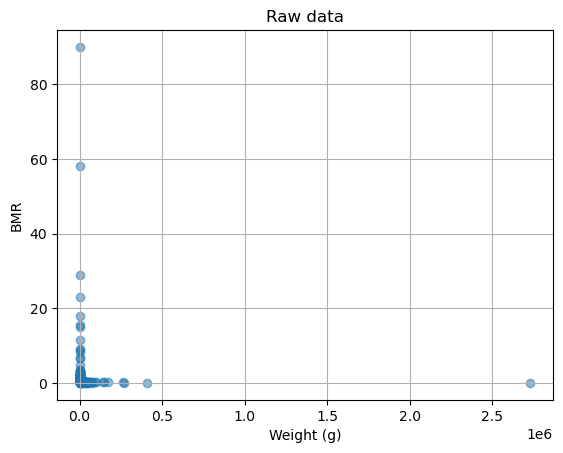

In [10]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('../datasets/elgar_appendix.csv')

# Create scatter plot
weight_column = 'weight (g)'
bmr_column = 'BMR'

plt.scatter(df[weight_column], df[bmr_column], alpha=0.5)
plt.title('Raw data')
plt.xlabel('Weight (g)')
plt.ylabel('BMR')
plt.grid(True)

plt.savefig('raw_scatter.png')
plt.show() 

## Plot 2 : Logarithmic Scatter Plot

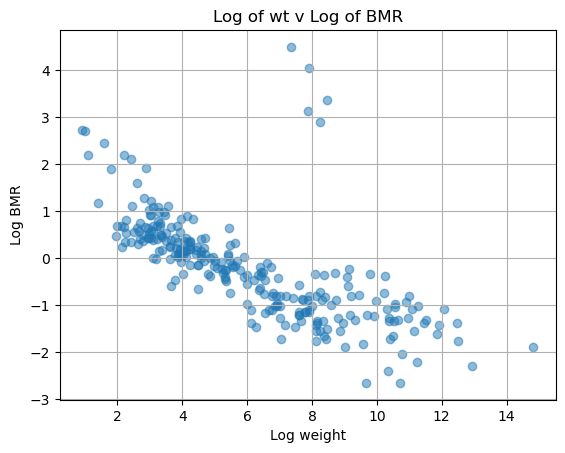

In [11]:
import numpy as np

df = pd.read_csv('../datasets/elgar_appendix.csv') 

log_weight = np.log(df['weight (g)'])
log_bmr = np.log(df['BMR'])

plt.scatter(log_weight, log_bmr, alpha=0.5)
plt.title('Log of wt v Log of BMR')
plt.xlabel('Log weight')
plt.ylabel('Log BMR')
plt.grid(True)

plt.savefig('log_scatter.png')
plt.show() 

## Plot 3 : Regression Analysis

Slope of the fitted line: -0.27
Intercept of the fitted line: 1.39


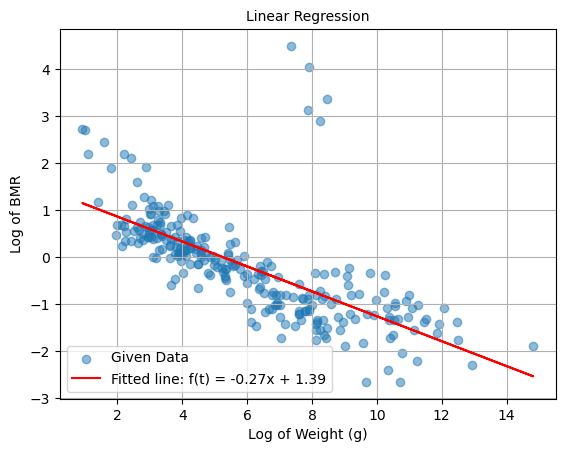

In [18]:
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../datasets/elgar_appendix.csv') 

log_weight = np.log(df['weight (g)'])
log_bmr = np.log(df['BMR'])
log_weight = log_weight.values.reshape(-1,1)

model = LinearRegression() 
model.fit(log_weight , log_bmr)
A = model.coef_[0]
B = model.intercept_
predicted_growth = model.predict(log_weight)

plt.scatter(log_weight, log_bmr, label='Given Data', alpha = 0.5)
plt.plot(log_weight, predicted_growth, label=f'Fitted line: f(t) = {A:.2f}x + {B:.2f}', color='red')
plt.xlabel('Log of Weight (g)',fontsize=10)
plt.ylabel('Log of BMR',fontsize=10)
plt.title('Linear Regression',fontsize=10)
plt.legend()
plt.grid(True)

print(f"Slope of the fitted line: {A:.2f}")
print(f"Intercept of the fitted line: {B:.2f}")

plt.savefig('linear_reg.png')
plt.show() 

## Plot 3 : Allometric Scaling Law

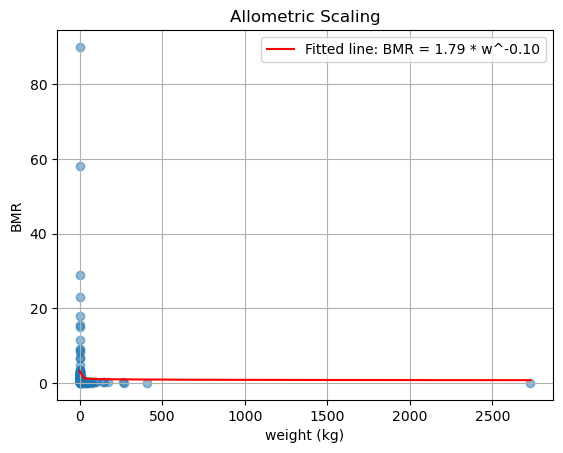

In [13]:
from scipy.optimize import curve_fit

# Load the dataset
file_path = '../datasets/elgar_appendix.csv'
df = pd.read_csv(file_path)

# Extract weight (grams) and BMR values
weight = df['weight (g)']
bmr = df['BMR']

# Convert weight from grams to kilograms
weight_kg = weight / 1000  

# Define the allometric scaling function
def allometric_scaling(w, A, B):
    return A * (w ** B)

# Fit the data to the allometric scaling model
popt, pcov = curve_fit(allometric_scaling, weight_kg, bmr)

# Extract the fitted parameters
A, B = popt

# Generate values for the fitted curve
weight_range = np.linspace(min(weight_kg), max(weight_kg), 100)
bmr_fit = allometric_scaling(weight_range, A, B)

# Plot the original data and the fitted curve

plt.scatter(weight_kg, bmr, alpha=0.5)
plt.plot(weight_range, bmr_fit, color='red', label =f'Fitted line: BMR = {A:.2f} * w^{B:.2f}')
plt.title('Allometric Scaling')
plt.xlabel('weight (kg)')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)

plt.savefig('allometric_fit.png')
plt.show() 

The values of the two parameters A and B were found to be:
A = 1.79, 
B = -0.10

### Plot A : Terrestrial

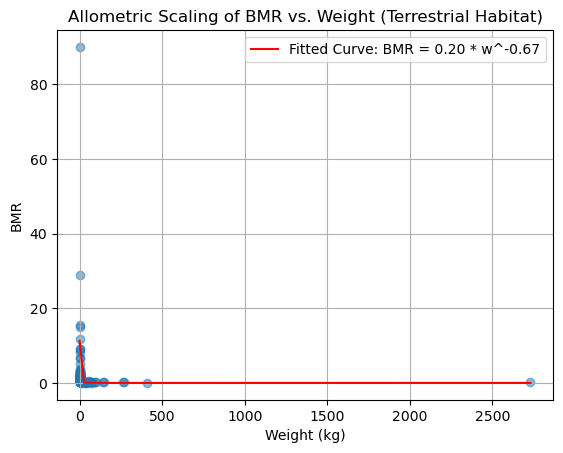

In [14]:

# Load the dataset
file_path = '../datasets/elgar_appendix.csv'
df = pd.read_csv(file_path)

# Filter data for species belonging to the "Terrestrial" habitat
terr_df = df[df['Habitat'] == 'Terrestrial']

# Extract weight (grams) and BMR values for "Terrestrial" habitat
weight_grams = terr_df['weight (g)']
bmr = terr_df['BMR']

# Convert weight from grams to kilograms
weight_kg = weight_grams / 1000  # 1 kg = 1000 grams

# Define the allometric scaling function
def allometric_scaling(w, A, B):
    return A * (w ** B)

# Fit the data to the allometric scaling model
popt, pcov = curve_fit(allometric_scaling, weight_kg, bmr)

# Extract the fitted parameters
A_fit, B_fit = popt

# Generate values for the fitted curve
weight_range = np.linspace(min(weight_kg), max(weight_kg), 100)
bmr_fit = allometric_scaling(weight_range, A_fit, B_fit)

# Plot the original data and the fitted curve for "Terrestrial" habitat

plt.scatter(weight_kg, bmr, alpha=0.5)
plt.plot(weight_range, bmr_fit, color='red', label=f'Fitted Curve: BMR = {A_fit:.2f} * w^{B_fit:.2f}')
plt.title('Allometric Scaling of BMR vs. Weight (Terrestrial Habitat)')
plt.xlabel('Weight (kg)')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)

plt.savefig('terrestrial.png')
plt.show() 

### Plot B : Aquatic

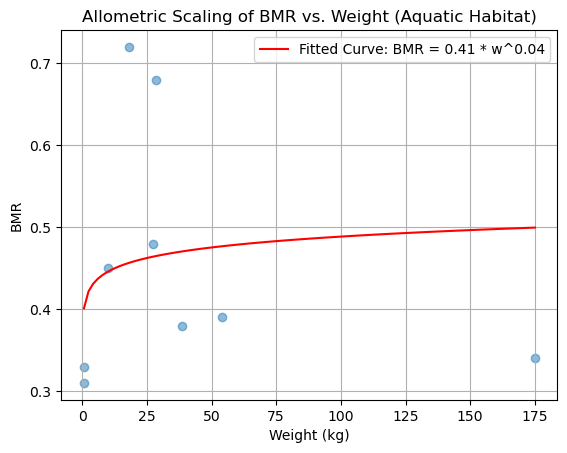

In [15]:

# Load the dataset
file_path = '../datasets/elgar_appendix.csv'
df = pd.read_csv(file_path)

aqua_df = df[df['Habitat'] == 'Aquatic']
weight_grams = aqua_df['weight (g)']
bmr = aqua_df['BMR']

# Convert weight from grams to kilograms
weight_kg = weight_grams / 1000  # 1 kg = 1000 grams

# Define the allometric scaling function
def allometric_scaling(w, A, B):
    return A * (w ** B)

# Fit the data to the allometric scaling model
popt, pcov = curve_fit(allometric_scaling, weight_kg, bmr)

# Extract the fitted parameters
A_fit, B_fit = popt

# Generate values for the fitted curve
weight_range = np.linspace(min(weight_kg), max(weight_kg), 100)
bmr_fit = allometric_scaling(weight_range, A_fit, B_fit)

# Plot the original data and the fitted curve for "Aquatic" habitat

plt.scatter(weight_kg, bmr, alpha=0.5)
plt.plot(weight_range, bmr_fit, color='red', label=f'Fitted Curve: BMR = {A_fit:.2f} * w^{B_fit:.2f}')
plt.title('Allometric Scaling of BMR vs. Weight (Aquatic Habitat)')
plt.xlabel('Weight (kg)')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)

plt.savefig('aquatic.png')
plt.show() 

### Plot C : Arboreal 

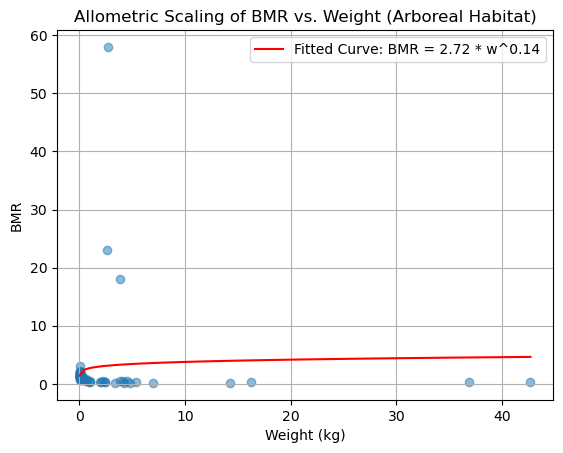

In [16]:

# Load the dataset
file_path = '../datasets/elgar_appendix.csv'
df = pd.read_csv(file_path)

arbo_df = df[df['Habitat'] == 'Arboreal']
weight_grams = arbo_df['weight (g)']
bmr = arbo_df['BMR']

# Convert weight from grams to kilograms
weight_kg = weight_grams / 1000  # 1 kg = 1000 grams

# Define the allometric scaling function
def allometric_scaling(w, A, B):
    return A * (w ** B)

# Fit the data to the allometric scaling model
popt, pcov = curve_fit(allometric_scaling, weight_kg, bmr)

# Extract the fitted parameters
A_fit, B_fit = popt

# Generate values for the fitted curve
weight_range = np.linspace(min(weight_kg), max(weight_kg), 100)
bmr_fit = allometric_scaling(weight_range, A_fit, B_fit)

# Plot the original data and the fitted curve for "Arboreal" habitat

plt.scatter(weight_kg, bmr, alpha=0.5)
plt.plot(weight_range, bmr_fit, color='red', label=f'Fitted Curve: BMR = {A_fit:.2f} * w^{B_fit:.2f}')
plt.title('Allometric Scaling of BMR vs. Weight (Arboreal Habitat)')
plt.xlabel('Weight (kg)')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)

plt.savefig('arboreal.png')
plt.show() 

### Plot D : Fossorial

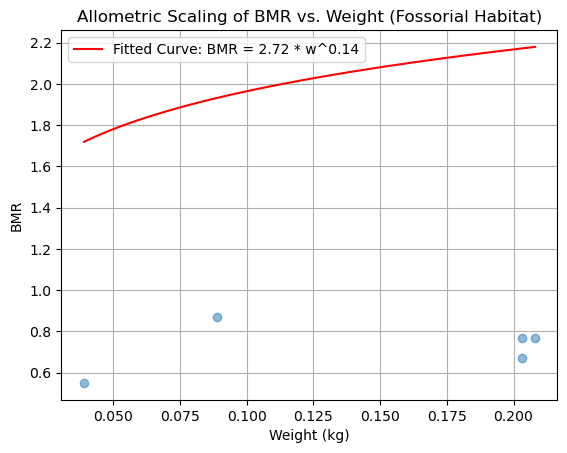

In [17]:

# Load the dataset
file_path = '../datasets/elgar_appendix.csv'
df = pd.read_csv(file_path)

foss_df = df[df['Habitat'] == 'Fossorial']
weight_grams = foss_df['weight (g)']
bmr = foss_df['BMR']

# Convert weight from grams to kilograms
weight_kg = weight_grams / 1000  # 1 kg = 1000 grams

# Define the allometric scaling function
def allometric_scaling(w, A, B):
    return A * (w ** B)

# Fit the data to the allometric scaling model
parameters, pcov = curve_fit(allometric_scaling, weight_kg, bmr)

# Extract the fitted parameters
A_fit, B_fit = popt

# Generate values for the fitted curve
weight_range = np.linspace(min(weight_kg), max(weight_kg), 100)
bmr_fit = allometric_scaling(weight_range, A_fit, B_fit)

# Plot the original data and the fitted curve for "Fossorial" habitat

plt.scatter(weight_kg, bmr, alpha=0.5)
plt.plot(weight_range, bmr_fit, color='red', label=f'Fitted Curve: BMR = {A_fit:.2f} * w^{B_fit:.2f}')
plt.title('Allometric Scaling of BMR vs. Weight (Fossorial Habitat)')
plt.xlabel('Weight (kg)')
plt.ylabel('BMR')
plt.legend()
plt.grid(True)

plt.savefig('fossorial.png')
plt.show() 